<h1 style="font-size:2rem;color:Blue;"> <center>Classification of handwritten digits using MNIST dataset<br>

In [227]:
import numpy as np
import scipy.special
import pandas as pd

In [228]:
# convolutional neural network class
class Neural_Network:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate
        
        # Define our matrices : 
        # the first matrix will take our input nodes and generate the first hidden : Weight Input to Hidden WIH
        self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
        # The wih is a matrix with hnodes rows, inodes columns and contains variables between -0.5 and 0.5
        
        # This second matrix is going to take the hidden impulses and produce output : Weight from Hidden to Output who
        self.who = np.random.rand(self.onodes, self.hnodes) - 0.5
        
        # Activation function
        self.activation_function = lambda x: scipy.special.expit(x)  # Logistic sigmoid
        
    def train(self, input_list, target_list):
        # The forward pass
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # The loss
        output_errors = targets - final_outputs
        
        # The backward pass
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # -Update our weights : 
        
        self.who += self.lr * np.dot(output_errors * final_outputs *(1.0 - final_outputs), np.transpose(hidden_outputs))
        
        self.wih += self.lr * np.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), np.transpose(inputs))
        
    def predict(self, inputs_list):
    # convert inputs_list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T

        # Calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # Calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signal into the final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # Calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs


In [229]:
n = Neural_Network(input_nodes=784, hidden_nodes=400, output_nodes=10, learning_rate=0.1)

Download data from https://www.kaggle.com/datasets/oddrationale/mnist-in-csv or use the **mnist_train_100.csv** as a training dataset and **mnist_test_10.csv** as a test dataset 

In [230]:
training_data_list = pd.read_csv('mnist_train_60K.csv')
training_data_list.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
example = training_data_list.iloc[2]
# the first number is the label, the other numbers represent the image 28 * 28 

In [232]:
label = example[0]
print(f'The hand written digit image represent the digit {label} ')

The hand written digit image represent the digit 4 


In [233]:
picture = example[1:] # 1--->785
picture.shape

(784,)

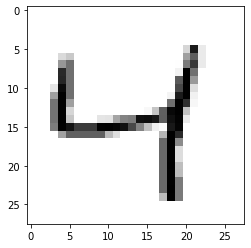

In [234]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(picture.values.reshape(28, 28), cmap='Greys')

In [84]:
# Train the Neural Netwrok

# epochs is the number of times the training data set is used for training
epochs = 10
output_nodes = 10

for e in range(epochs):
    print('Epoch : ', e + 1)
    
    # go through all records in the training data set
    for i in range(len(training_data_list)):
        # split the record by the ',' commas
        record = training_data_list.iloc[i]
        # scale and shift the inputs
        inputs = (np.asfarray(record[1:]) / 255 * 0.99) + 0.01  # get inputs between 0.01 and 1 
        
        # create the target output values : 
        # all values are 0.01 except the desired label which is 0.99
        targets = np.zeros(output_nodes) + 0.01
        # inputs[0] is the target label for this record
        targets[int(record[0])] = 0.99
        n.train(inputs, targets)

Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
Epoch :  6
Epoch :  7
Epoch :  8
Epoch :  9
Epoch :  10


In [108]:
# save the best weights after training in a text file

best_wih = n.wih
best_who = n.who

np.savetxt("best_wih.txt", best_wih)
np.savetxt("best_who.txt", best_who)

In [109]:
# TESTING 
# we are going to use 10 images to test

# load the MNIST test data csv file into a list : 
test_data_list = pd.read_csv('mnist_test_10K.csv')

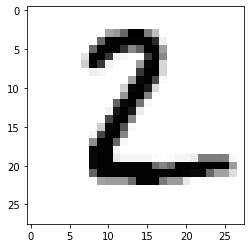

In [110]:
record = test_data_list.iloc[1]

picture = np.asfarray(record[1:])
plt.imshow(picture.reshape(28, 28), cmap='Greys')

In [113]:
inputs = ((record[1:]) / 255 * 0.99) + 0.01

In [114]:
n.predict(inputs)

array([[2.41235127e-03],
       [3.56723013e-02],
       [9.05185272e-01],
       [5.47005381e-02],
       [6.62393423e-04],
       [5.53341800e-03],
       [5.49862573e-03],
       [6.20877682e-04],
       [4.81113350e-03],
       [1.63048501e-04]])

In [115]:
scoreCard = []

for i in range(len(test_data_list)):
    record = test_data_list.iloc[i]
    
    correct_label = record[0]
    
    inputs = (np.asfarray(record[1:]) / 255 * 0.99) + 0.01
    
    outputs = n.predict(inputs)
    label = np.argmax(outputs)
    
    if (label == correct_label):
        scoreCard.append(1)
    else:
        scoreCard.append(0)
        
scoreCard_array = np.asfarray(scoreCard)
performance = scoreCard_array.sum() / scoreCard_array.size
print('Performance : ', performance*100,'%')

Performance :  97.27 %


<h1 style="font-size:2rem;color:green;"><strong> Test on a new dataset </strong></h1>

In [117]:
import imageio
import glob

In [136]:
new_dataset = []
path_to_new_dataset = 'new_dataset'
for image_file_name in glob.glob(path_to_new_dataset + '/?.png'):
    label = int(image_file_name[-5:-4])
    print(label)
    print('Loading image ...', image_file_name)
    
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    img_data = 255.0 - img_array.reshape(784)
    
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    record = np.append(label, img_data)
    
    new_dataset.append(record)    

2
Loading image ... new_dataset\2.png
3
Loading image ... new_dataset\3.png
4
Loading image ... new_dataset\4.png
5
Loading image ... new_dataset\5.png
6
Loading image ... new_dataset\6.png


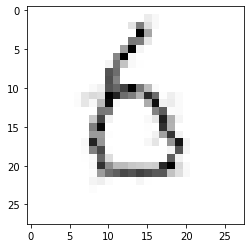

In [221]:
item = 4
plt.imshow(new_dataset[item][1:].reshape(28, 28), cmap='Greys')

In [222]:
correct_label = new_dataset[item][0]
correct_label

6.0

In [223]:
inputs = new_dataset[item][1:]

outputs = n.predict(inputs)
# print(outputs)

prediction = np.argmax(outputs)
print(f'Prediction : {prediction} by {outputs[prediction]*100}%')

Prediction : 6 by [79.21736725]%
